In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from math import pi

In [97]:
def make_spider(df, row, title, color):
 
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([20,40,60,80,100], ["20","40","60","80","100"], color="grey", size=7)
    plt.ylim(0,80)

    # Ind1
    values=df.loc[row].drop("Preferred Party").values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.2)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)
    plt.tight_layout(pad = 3)

In [3]:
#https://python-graph-gallery.com/392-use-faceting-for-radar-chart/
vdf = pd.read_csv("..\Data\sa2_votes.csv")

In [74]:
# Get Census data for Selected Characteristics
cdf1 = pd.read_csv("..\Data\census_selected_characteristics.csv")
cdf1["less_than_35_percent"] = (cdf1["age_20_24_percent"] + cdf1["age_25_34_percent"] + cdf1["age_35_44_percent"]) * 100
cdf1["median_birthplace_percent"] = cdf1["birthplace_australia_percent"] * 100
cdf1["median_multilingual_percent"] = (1- cdf1["lang_eng_only_percent"]) * 100
cdf1 = cdf1[["sa2_maincode_2016","median_birthplace_percent","median_multilingual_percent","less_than_35_percent"]]

In [75]:
df = pd.merge(vdf, cdf1, left_on = "SA2_MAIN16", right_on = "sa2_maincode_2016")
df["Preferred Party"] = np.where(df["liberal/national coalition votes"] / df["totalvotes"] > 0.5, "Liberal", "ALP")
df = df[["Preferred Party","median_birthplace_percent","median_multilingual_percent","less_than_35_percent"]]
df.head()

,Preferred Party,median_birthplace_percent,median_multilingual_percent,less_than_35_percent
0,ALP,76.136364,14.772727,21.926653
1,ALP,77.046199,19.376743,33.139323
2,ALP,67.081719,28.804649,42.030991
3,ALP,68.763059,26.535729,41.140827
4,ALP,76.950313,15.236634,29.110114


In [18]:
religiondf = pd.read_csv("..\Data\census_religious_affimiliation.csv")

In [76]:
df2 = pd.merge(vdf, religiondf, left_on = "SA2_MAIN16", right_on = "sa2_maincode_2016")
df2["Preferred Party"] = np.where(df2["liberal/national coalition votes"] / df2["totalvotes"] > 0.5, "Liberal", "ALP")
df2 = df2[["Preferred Party", "christianity_tot_percent"]]
df2["median_christian_pct"] = df2["christianity_tot_percent"] * 100
df2 = df2[["Preferred Party", "median_christian_pct"]]
df2 = df2.groupby("Preferred Party").median()
df2.head()

,median_christian_pct
Preferred Party,
ALP,48.993559
Liberal,56.348083


In [77]:
educationdf = pd.read_csv("..\Data\census_education_level.csv")

In [78]:
df3 = pd.merge(vdf, educationdf, left_on = "SA2_MAIN16", right_on = "sa2_maincode_2016")
df3["Preferred Party"] = np.where(df3["liberal/national coalition votes"] / df3["totalvotes"] > 0.5, "Liberal", "ALP")
df3 = df3[["Preferred Party", "bach_post_grad_percent"]]
df3["median_bach_post_pct"] = df3["bach_post_grad_percent"] * 100
df3 = df3[["Preferred Party", "median_bach_post_pct"]]
df3 = df3.groupby("Preferred Party").median()
df3.head()

,median_bach_post_pct
Preferred Party,
ALP,34.694144
Liberal,23.455492


In [94]:
pdf = pd.merge(df, df2, left_on = "Preferred Party", right_on = "Preferred Party")
pdf = pdf.groupby("Preferred Party").median()
pdf.reset_index(inplace = True)
pdf.head()

,Preferred Party,median_birthplace_percent,median_multilingual_percent,less_than_35_percent,median_christian_pct
0,ALP,66.282495,26.040906,35.463542,48.993559
1,Liberal,76.607960,13.617363,28.937691,56.348083


In [95]:
pdf = pd.merge(pdf, df3, left_on = "Preferred Party", right_on = "Preferred Party")
pdf.columns = ["Preferred Party","Native Born","Multilingual","Age Below 45", "Christian","Higher Education"]
#pdf = pdf.groupby("Preferred Party").median()
#pdf.reset_index(inplace = True)
pdf.head()

,Preferred Party,Native Born,Multilingual,Age Below 45,Christian,Higher Education
0,ALP,66.282495,26.040906,35.463542,48.993559,34.694144
1,Liberal,76.607960,13.617363,28.937691,56.348083,23.455492


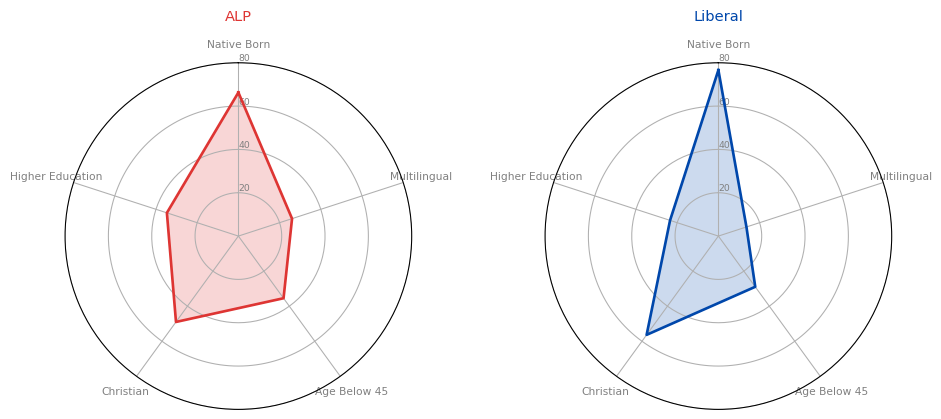

In [98]:
# Initialize the figure
my_dpi = 96
plt.figure(figsize = (1000/my_dpi, 1000/my_dpi), dpi = my_dpi)
      
# Loop to plot
for row in range(0, len(pdf.index)):
    if pdf["Preferred Party"][row] == "ALP":
        party_colour = "#DE3533"
    else:
        party_colour = "#0047AB"
        
    make_spider(pdf, row=row, title=pdf["Preferred Party"][row], color=party_colour)
